## 4-3. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [3]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [13]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.
from bs4 import BeautifulSoup
import requests
import time

frequency = {}

for i in range(1, 11):
    res = requests.get(f"https://qna.programmers.co.kr/?page={i}", user_agent)
    time.sleep(3)
    soup = BeautifulSoup(res.text, "html.parser")

    # 1. ul 태그를 모두 찾기
    # 2. 1번 안에 있는 li 태그의 text를 추출

    ul_tags = soup.find_all("ul", "question-tags")
    for ul in ul_tags:
        li_tags = ul.find_all("li")
        for li in li_tags:
            tag = li.text.strip()
            if tag not in frequency:
                frequency[tag] = 1
            else:
                frequency[tag] += 1

print(frequency)

{'python': 200, 'class': 9, 'mssql': 2, 'migration': 1, 'c#': 6, 'c++': 25, 'visualstudio': 3, 'deploy': 1, 'nginx': 1, 'stack': 2, 'token': 1, 'iframe': 1, 'react': 7, 'javascript': 20, 'css': 7, 'border': 1, 'html': 13, 'selector': 1, 'div': 1, 'vscode': 5, 'flutter': 1, 'android': 5, 'code': 3, 'xcode': 2, 'heapsort': 2, 'c': 47, 'operator': 1, 'django': 5, 'serializable': 1, 'java': 39, 'node.js': 7, 'mysql': 3, 'turtle': 2, 'sorting': 2, 'mongodb': 1, 'directx': 1, 'pandas': 23, 'dataframe': 11, 'excel': 5, 'scanf': 3, 'ipc': 1, 'openai': 1, 'cv2': 2, 'gui': 4, 'windows': 4, 'opencv': 7, 'interface': 1, 'inheritance': 2, 'back-end': 1, 'front-end': 1, 'spring-boot': 1, 'web': 1, 'security': 1, 'firewall': 1, 'selenium': 5, 'beautifulsoup': 7, 'urllib': 1, 'unity': 1, 'scraping': 2, 'requests': 1, 'spring': 4, 'floatig-point': 1, 'editor': 1, 'mfc': 2, 'pointer': 1, 'array': 3, 'visual-studio-2010': 1, 'http': 1, 'socket-programming': 1, 'coding-test': 10, 'numpy': 4, 'algorithm': 

In [15]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.
from collections import Counter

counter = Counter(frequency)

counter.most_common(10)

[('python', 200),
 ('c', 47),
 ('java', 39),
 ('c++', 25),
 ('pandas', 23),
 ('javascript', 20),
 ('html', 13),
 ('dataframe', 11),
 ('coding-test', 10),
 ('class', 9)]

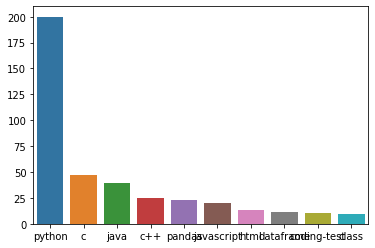

In [17]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.
import seaborn as sns
import matplotlib.pyplot as plt

x = [elem[0] for elem in counter.most_common(10)]
y = [elem[1] for elem in counter.most_common(10)]

sns.barplot(x=x, y=y)
plt.show()

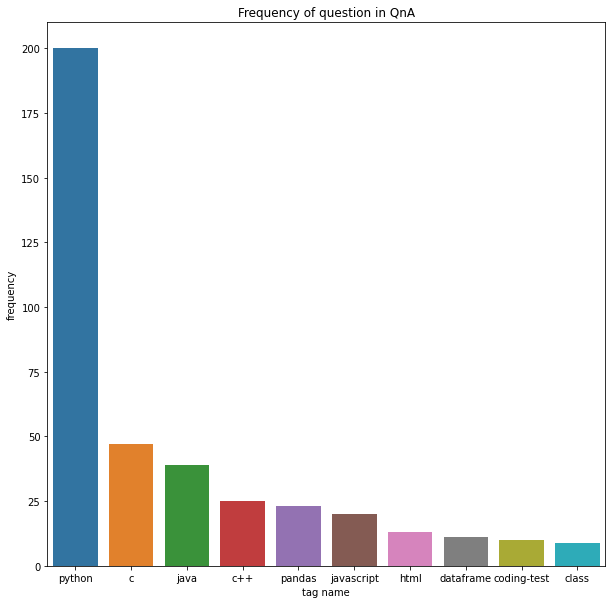

In [20]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

plt.figure(figsize = (10,10))
plt.title("Frequency of question in QnA")
plt.xlabel("tag name")
plt.ylabel("frequency")
sns.barplot(x=x, y=y)
plt.show()